In [12]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, librosa, IPython.display, urllib

# Homework Part 1: Understanding Audio Features through Sonification

*There is no written component to be submitted for this part, Part 1.* This section is intended to acquaint you with Python, the IPython notebook, and librosa.

When you see a cell that looks like this:

In [3]:
plt.plot?

that is a cue to use a particular command, in this case, `plot`. Run the cell to see documentation for that command. (To quickly close the Help window, press `q`.) 

For more documentation, visit the links in the Help menu above.

## Goals

In this exercise, you will segment, feature extract, and analyze audio files.

1. Detect onsets in an audio signal.
2. Segment the audio signal at each onset.
3. Compute features for each segment.
4. Gain intuition into the features by listening to each segment separately.

## Step 1: Retrieve Audio

Download the file `simple_loop.wav` onto your local machine.

In [136]:
filename = '58bpm.wav'
url = 'http://audio.musicinformationretrieval.com/' + filename

In [137]:
urllib.request.urlretrieve(url, filename)

('58bpm.wav', <http.client.HTTPMessage at 0x116d3cd30>)

Make sure the download worked:

In [138]:
%ls *.wav

125_bounce.wav    58bpm.wav         conga_groove.wav  simple_loop.wav


Save the audio signal into an array.

In [139]:
fs, sr = librosa.load(filename)

Show the sample rate:

In [140]:
print(sr)

22050


Listen to the audio signal.

In [141]:
IPython.display.Audio(filename=filename)

Display the audio signal.

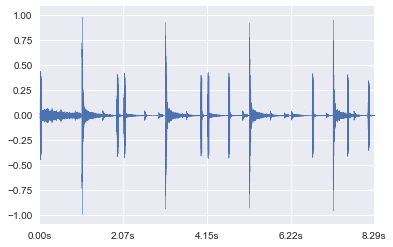

In [142]:
librosa.display.waveplot(fs, sr)

Compute the short-time Fourier transform:

In [143]:
stft = librosa.stft(fs)

For display purposes, compute the log amplitude of the STFT:

In [144]:
logamp = librosa.logamplitude(stft)

Display the spectrogram.

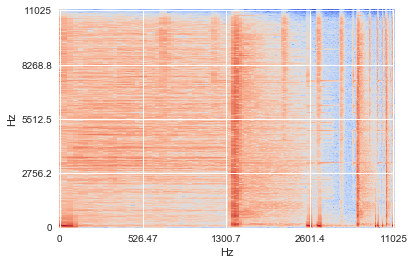

In [145]:
# Play with the parameters, including x_axis and y_axis
librosa.display.specshow(logamp, x_axis='log', y_axis='linear', freq_fmt='Hz')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/librosa/core/pitch.py:160: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)


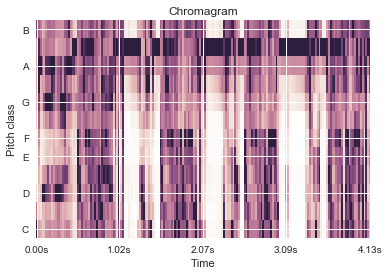

In [146]:
cm = librosa.feature.chromagram(fs, sr, hop_length=1024)
librosa.display.specshow(cm, sr=44100, hop_length=1024, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')

## Step 2: Detect Onsets

Find the times, in seconds, when onsets occur in the audio signal.

In [147]:
onset = librosa.onset.onset_detect(fs)

In [148]:
times = librosa.frames_to_time(onset)

Convert the onset times into sample indices.

In [149]:
index=librosa.frames_to_samples(times)

In [150]:
index

array([ 534,  986, 1069, 1343, 1521, 1593, 2068, 2128, 2401, 2579, 2651,
       3198, 3459, 3637, 3721, 4184])

Play a "beep" at each onset.

In [151]:
librosa.core.clicks?
# Use the `length` parameter so the click track is the same length as the original signal
clicker = librosa.core.clicks(times, length=len(fs))

IPython.display.Audio(clicker, rate=sr)

In [113]:
# Play the click track "added to" the original signal
fs1 = fs + clicker
IPython.display.Audio(fs1, rate=sr)

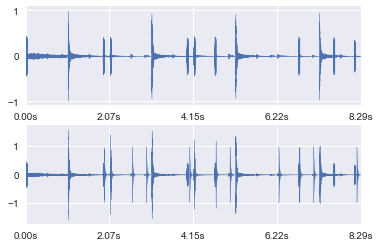

In [114]:
plt.figure()
plt.subplot(2,1,1)
librosa.display.waveplot(fs)
plt.subplot(2,1,2)
librosa.display.waveplot(fs1)

## Step 3: Segment the Audio

Save into an array, `segments`, 100-ms segments beginning at each onset.

In [124]:
# Assuming these variables exist:
# x: array containing the audio signal
# fs: corresponding sampling frequency
# onset_samples: array of onsets in units of samples
frame_sz = int(0.100*sr)
segments = numpy.array([fs[i:i+frame_sz] for i in index])

Here is a function that adds 300 ms of silence onto the end of each segment and concatenates them into one signal.

Later, we will use this function to listen to each segment, perhaps sorted in a different order.

In [125]:
def concatenate_segments(segments, fs=44100, pad_time=0.300):
    padded_segments = [numpy.concatenate([segment, numpy.zeros(int(pad_time*fs))]) for segment in segments]
    return numpy.concatenate(padded_segments)
concatenated_signal = concatenate_segments(segments, sr)

Listen to the newly concatenated signal.

In [127]:
IPython.display.Audio(concatenated_signal, rate=22050)

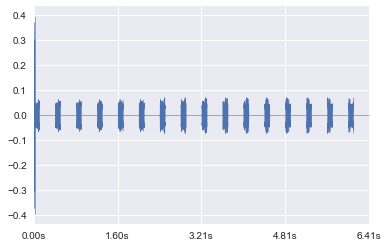

In [128]:
librosa.display.waveplot(concatenated_signal)

## Step 4: Extract Features

For each segment, compute the zero crossing rate.

In [152]:

# returns a boolean array of zero crossing locations, not a total count
zc = numpy.array([librosa.core.zero_crossings(segment) for segment in segments] )
sum(librosa.core.zero_crossings(segments[1]))


1006

In [153]:
# you'll need this to actually count the number of zero crossings per segment
zcrs = numpy.array([sum(zc[i]) for i in range(0, len(zc))])
zcrs

array([ 828, 1006, 1025, 1000,  971,  966,  984,  986,  986,  998,  997,
       1009, 1018, 1023, 1025, 1023])

Use `argsort` to find an index array, `ind`, such that `segments[ind]` is sorted by zero crossing rate.

In [131]:
# zcrs: array, number of zero crossings in each frame
ind = numpy.argsort(zcrs)
ind

array([ 0,  5,  4,  6,  7,  8, 10,  9,  3,  1, 11, 12, 13, 15,  2, 14])

Sort the segments by zero crossing rate, and concatenate the sorted segments.

In [132]:
concatenated_signal = concatenate_segments(segments[ind], sr)

## Step 5: Listen to Segments

Listen to the sorted segments. What do you hear?

In [133]:
IPython.display.Audio(concatenated_signal, rate=sr)

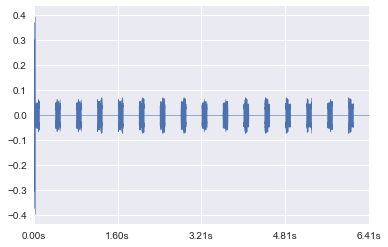

In [134]:
librosa.display.waveplot(concatenated_signal)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/librosa/core/pitch.py:160: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)


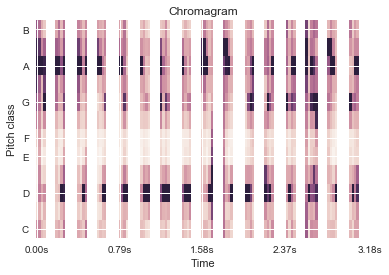

In [135]:
cm = librosa.feature.chromagram(concatenated_signal, sr, hop_length=1024)
librosa.display.specshow(cm, sr=44100, hop_length=1024, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')

## More Exercises

Repeat the steps above for the following audio files:

In [ ]:
#url = 'http://audio.musicinformationretrieval.com/125_bounce.wav'
#url = 'http://audio.musicinformationretrieval.com/conga_groove.wav'
#url = 'http://audio.musicinformationretrieval.com/58bpm.wav'